Metoda Prostokątów

In [5]:
def prostokatow(function, a, b, i):
    dx = (b - a) / i
    integr = 0
    for x in range(i):
        x = x * dx + a
        integr += dx * eval(function)
    return integr


function = input("Funkcja: ")
a = float(input("Początek przedziału: "))
b = float(input("Koniec przedziału: "))
i = int(input("Liczba podprzedziałów: "))
print("Wynik = {prostokatow}".format( prostokatow = prostokatow(function, a, b, i)))

Funkcja: x*2
Początek przedziału: 2
Koniec przedziału: 4
Liczba podprzedziałów: 200
Wynik = 11.98


Metoda Trapezów

In [4]:
def trapezow(function, a, b, i):
    dx = (b - a) / i
    integr = 0
    for x in range(i):
        x = x * dx + a
        fx1 = eval(function)
        x += dx
        fx2 = eval(function)
        integr += 0.5 * dx * (fx1 + fx2)
    return integr

function = input("Funkcja: ")
a = float(input("Początek przedziału: "))
b = float(input("Koniec przedziału: "))
i = int(input("Liczba podprzedziałów: "))
print("Wynik = {trapezow}".format( trapezow = trapezow(function, a, b, i)))


Funkcja: x*2
Początek przedziału: 2
Koniec przedziału: 4
Liczba podprzedziałów: 200
Wynik = 11.999999999999998


Metoda Simpsona

In [9]:
def simpson(function, a, b, n):
  delta_x = (b-a)/n
  integr = 0  
  for i in range(0, n, 2):
    x = a + delta_x * 2 * i
    integr += delta_x * (function(x) + 4 * function(x + delta_x) + function(x + 2 * delta_x)) / 3
  return integr

a = float(input("Początek przedziału: "))
b = float(input("Koniec przedziału: "))
n = int(input("Liczba podprzedziałów: "))
print("Wynik = {simpson}".format( simpson = simpson(lambda x: x*2, a, b, n)))

Początek przedziału: 2
Koniec przedziału: 4
Liczba podprzedziałów: 200
Wynik = 15.960000000000003


**Zad 2**

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# def function(x):
#   return (x - 2) * (x + 1) * (x - 4)

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([0.0, 8.0, 6.0, -0.0, -4.0, 0.0], dtype=float)

model.fit(xs, ys, epochs=500)
print(model.predict([5.0]))

Epoch 1/500
1/1 [==============================] - 0s 443ms/step - loss: 25.4353
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 24.1958
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 23.1888
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 22.3653
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 21.6870
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 21.1233
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 20.6506
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 20.2500
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 19.9067
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 19.6090
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 19.3479
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 19.1161
Epoch 13/500
1/1 [=============================

**Zad 3**

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [14]:
len(train_labels)

60000

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

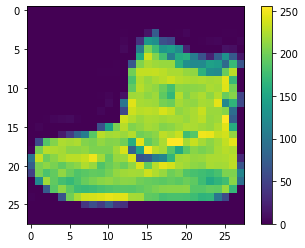

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

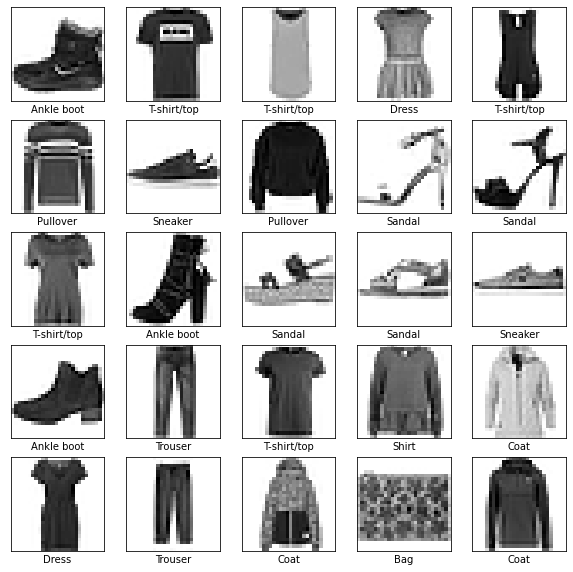

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5111 - accuracy: 0.5453
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6792 - accuracy: 0.7544
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5848 - accuracy: 0.7881
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5322 - accuracy: 0.8120
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5048 - accuracy: 0.8211
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4771 - accuracy: 0.8324
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4659 - accuracy: 0.8357
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4572 - accuracy: 0.8391
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4424 - accuracy: 0.8458
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.434

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4610 - accuracy: 0.8349

Test accuracy: 0.8349000215530396


In [29]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [30]:
predictions = probability_model.predict(test_images)

In [31]:
predictions[0]

array([6.8146454e-07, 6.3187755e-08, 7.8696949e-06, 8.0633299e-06,
       1.0662035e-05, 1.7555529e-01, 3.2025157e-05, 2.7440405e-01,
       6.4407056e-03, 5.4354060e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

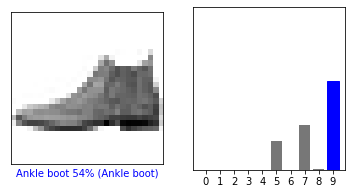

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

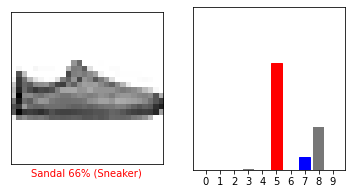

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

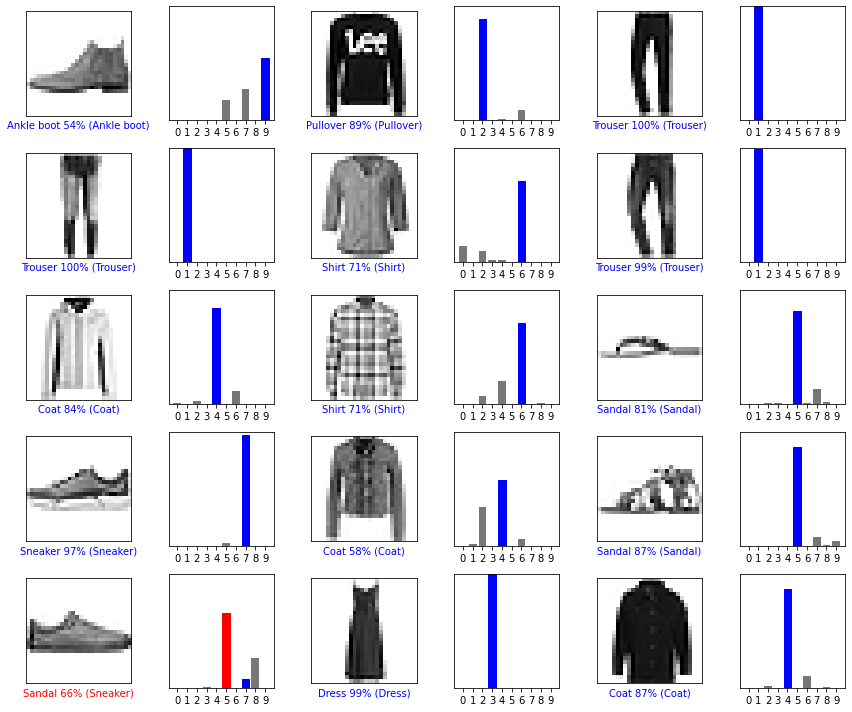

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()